In [2]:
import requests
import pandas as pd

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='Italy'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date': '2020-03-28',
    'end_date': '2020-04-06'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

#for key, value in data['data']['region'][region].items():
#    print(key, value)

# use pandas to get the data
df = pd.DataFrame.from_dict(data['data']['region'][region])
print(df)
print('---')


               2020-03-28  2020-03-29  2020-03-30  2020-03-31  2020-04-01  \
confirmed_add        5974        5217        4050        4053        4782   
deaths_add            889         756         812         837         727   
recovered_add        1434         646        1590        1109        1118   
confirmed           92472       97689      101739      105792      110574   
deaths              10023       10779       11591       12428       13155   
recovered           12384       13030       14620       15729       16847   

               2020-04-02  2020-04-03  2020-04-04  2020-04-05  2020-04-06  
confirmed_add        4668        4585        4805        4316        3599  
deaths_add            760         766         681         525         636  
recovered_add        1431        1480        1238         819        1022  
confirmed          115242      119827      124632      128948      132547  
deaths              13915       14681       15362       15887       16523  
reco

In [3]:
# exchange the row and column
df = df.T
print(df)
print('---')

            confirmed_add  deaths_add  recovered_add  confirmed  deaths  \
2020-03-28           5974         889           1434      92472   10023   
2020-03-29           5217         756            646      97689   10779   
2020-03-30           4050         812           1590     101739   11591   
2020-03-31           4053         837           1109     105792   12428   
2020-04-01           4782         727           1118     110574   13155   
2020-04-02           4668         760           1431     115242   13915   
2020-04-03           4585         766           1480     119827   14681   
2020-04-04           4805         681           1238     124632   15362   
2020-04-05           4316         525            819     128948   15887   
2020-04-06           3599         636           1022     132547   16523   

            recovered  
2020-03-28      12384  
2020-03-29      13030  
2020-03-30      14620  
2020-03-31      15729  
2020-04-01      16847  
2020-04-02      18278  
2020-0

In [5]:
# calculate mortailty rate
df['mortality rate'] = df.apply(lambda x: x['deaths'] / x['confirmed'], axis=1)
print(df)
print('---')

            confirmed_add  deaths_add  recovered_add  confirmed  deaths  \
2020-03-28           5974         889           1434      92472   10023   
2020-03-29           5217         756            646      97689   10779   
2020-03-30           4050         812           1590     101739   11591   
2020-03-31           4053         837           1109     105792   12428   
2020-04-01           4782         727           1118     110574   13155   
2020-04-02           4668         760           1431     115242   13915   
2020-04-03           4585         766           1480     119827   14681   
2020-04-04           4805         681           1238     124632   15362   
2020-04-05           4316         525            819     128948   15887   
2020-04-06           3599         636           1022     132547   16523   

            recovered  mortality rate  
2020-03-28      12384        0.108390  
2020-03-29      13030        0.110340  
2020-03-30      14620        0.113929  
2020-03-31    

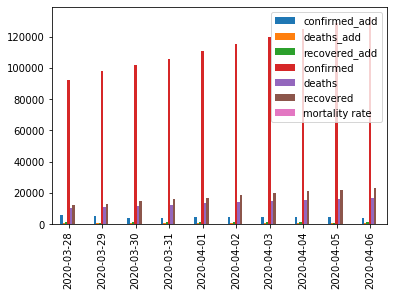

In [6]:
df.plot(kind='bar')

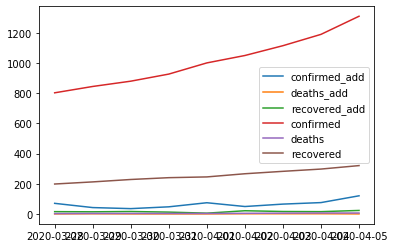

In [60]:
df.plot(kind='line')

In [3]:
df

,confirmed_add,deaths_add,recovered_add,confirmed,deaths,recovered
2020-03-29,19408,441,1593,140886,2467,2665
2020-03-30,20921,511,2979,161807,2978,5644
2020-03-31,26365,895,1380,188172,3873,7024
2020-04-01,25200,884,1450,213372,4757,8474
2020-04-02,30081,1169,527,243453,5926,9001
2020-04-03,32133,1161,706,275586,7087,9707
2020-04-04,33264,1320,4945,308850,8407,14652


In [63]:
url = 'https://covid-19.adapay.tech/api/v1/'
token = '497115d0c2ff9586bf0fe03088cfdbe2'
region = 'US'

payload = {
    'region': region,
    'start_date': '2020-03-26',
    'end_date': '2020-03-30'
}

r = requests.get(url+'infection/region/detail', params=payload, headers=headers)

data = r.json()
df = pd.DataFrame.from_dict(data['data']['area'])
print(df)

                                                      Alabama  \
2020-03-26  {'confirmed_add': 136, 'deaths_add': 0, 'recov...   
2020-03-27  {'confirmed_add': 70, 'deaths_add': 3, 'recove...   
2020-03-28  {'confirmed_add': 107, 'deaths_add': 0, 'recov...   
2020-03-29  {'confirmed_add': 131, 'deaths_add': 6, 'recov...   
2020-03-30  {'confirmed_add': 74, 'deaths_add': 0, 'recove...   

                                                       Alaska  \
2020-03-26  {'confirmed_add': 15, 'deaths_add': 0, 'recove...   
2020-03-27  {'confirmed_add': 2, 'deaths_add': 0, 'recover...   
2020-03-28  {'confirmed_add': 27, 'deaths_add': 1, 'recove...   
2020-03-29  {'confirmed_add': 17, 'deaths_add': 0, 'recove...   
2020-03-30  {'confirmed_add': 12, 'deaths_add': 1, 'recove...   

                                               American Samoa  \
2020-03-26  {'confirmed_add': 0, 'deaths_add': 0, 'recover...   
2020-03-27  {'confirmed_add': 0, 'deaths_add': 0, 'recover...   
2020-03-28  {'confirmed

In [65]:
url = 'https://covid-19.adapay.tech/api/v1/'
token = '497115d0c2ff9586bf0fe03088cfdbe2'
region = 'US'

payload = {
    'region': region,
    'start_date': '2020-03-26',
    'end_date':'2020-04-05'
}

r = requests.get(url+'infection/region/detail', params=payload, headers=headers)

data = r.json()
df = pd.DataFrame.from_dict(data['data']['area']['New York'])
print(df)

               2020-03-26  2020-03-27  2020-03-28  2020-03-29  2020-03-30  \
confirmed_add        7036        6999        7534        7238        7015   
deaths_add            100         142         201         237         253   
recovered_add           0           0           0           0           0   
confirmed           37877       44876       52410       59648       66663   
deaths                385         527         728         965        1218   
recovered               0           0           0           0           0   

               2020-03-31  2020-04-01  2020-04-02  2020-04-03  2020-04-04  \
confirmed_add        9170        8115        8558       10481       10846   
deaths_add            332         391         432         562         630   
recovered_add           0           0           0           0           0   
confirmed           75833       83948       92506      102987      113833   
deaths               1550        1941        2373        2935        3565  

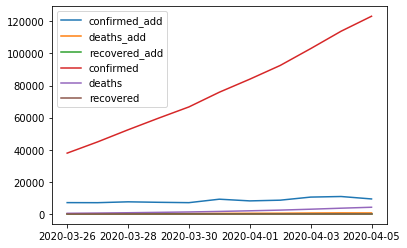

In [67]:
df=df.T
df.plot(kind='line')

In [51]:
# do not use pandas

url = 'https://covid-19.adapay.tech/api/v1/'
token = '497115d0c2ff9586bf0fe03088cfdbe2'

payload = {
    'start_date':'2020-03-23'
}

r = requests.get(url+'infection/global', params=payload, headers=headers)

data = r.json()
print(data)

{'code': '30011', 'message': 'system error', 'response_id': 'OcJktpZhjRNHPGVeaznbqYEwQ'}


In [40]:
""" 
@author:Bingo.he 
@file: get_target_value.py 
@time: 2017/12/22 
"""
def get_target_value(key, dic, tmp_list):
    """
    :param key: 目标key值
    :param dic: JSON数据
    :param tmp_list: 用于存储获取的数据
    :return: list
    """
    if not isinstance(dic, dict) or not isinstance(tmp_list, list):  # 对传入数据进行格式校验
        return 'argv[1] not an dict or argv[-1] not an list '

    if key in dic.keys():
        tmp_list.append(dic[key])  # 传入数据存在则存入tmp_list

    for value in dic.values():  # 传入数据不符合则对其value值进行遍历
        if isinstance(value, dict):
            get_target_value(key, value, tmp_list)  # 传入数据的value值是字典，则直接调用自身
        elif isinstance(value, (list, tuple)):
            _get_value(key, value, tmp_list)  # 传入数据的value值是列表或者元组，则调用_get_value


    return tmp_list


def _get_value(key, val, tmp_list):
    for val_ in val:
        if isinstance(val_, dict):  
            get_target_value(key, val_, tmp_list)  # 传入数据的value值是字典，则调用get_target_value
        elif isinstance(val_, (list, tuple)):
            _get_value(key, val_, tmp_list)   # 传入数据的value值是列表或者元组，则调用自身
    
list0=[]
print(get_target_value('New York',data,list0))

[{'2020-03-26': {'confirmed_add': 7036, 'deaths_add': 100, 'recovered_add': 0, 'confirmed': 37877, 'deaths': 385, 'recovered': 0}, '2020-03-27': {'confirmed_add': 6999, 'deaths_add': 142, 'recovered_add': 0, 'confirmed': 44876, 'deaths': 527, 'recovered': 0}, '2020-03-28': {'confirmed_add': 7534, 'deaths_add': 201, 'recovered_add': 0, 'confirmed': 52410, 'deaths': 728, 'recovered': 0}, '2020-03-29': {'confirmed_add': 7238, 'deaths_add': 237, 'recovered_add': 0, 'confirmed': 59648, 'deaths': 965, 'recovered': 0}, '2020-03-30': {'confirmed_add': 7015, 'deaths_add': 253, 'recovered_add': 0, 'confirmed': 66663, 'deaths': 1218, 'recovered': 0}}]


In [61]:
url = 'https://covid-19.adapay.tech/api/v1/'

r = requests.post(url+'authentication/register', data = {'email':'wingfish@gmail.com'})

print(r)



<Response [400]>
